<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/linearRegCostosSeguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#import libraries
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
data = pd.read_csv(r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [50]:
sns.set_style('white')

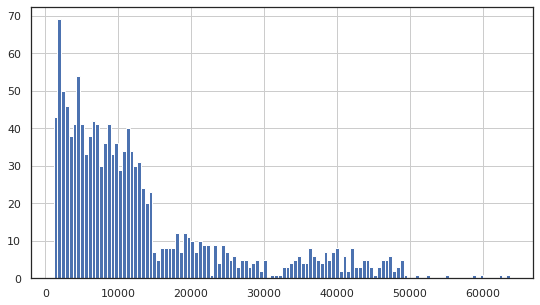

In [51]:
plt.figure(figsize=(9,5))

data.charges.hist(bins=120)

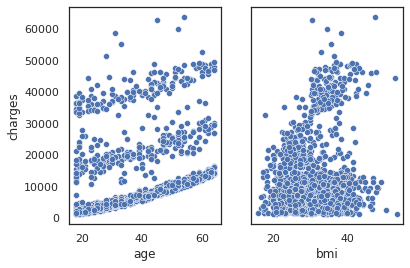

In [52]:
fig, axes = plt.subplots(1,2, sharey=True)

sns.scatterplot(x='age', y='charges', data=data, ax=axes[0])
sns.scatterplot(x='bmi', y='charges', data=data, ax=axes[1])

plt.show()

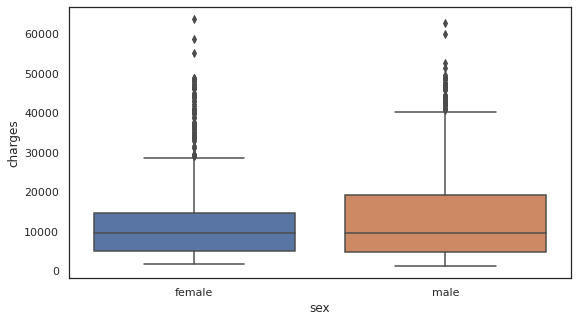

In [53]:
plt.figure(figsize=(9,5))

sns.boxplot(x='sex', y='charges', data=data)
plt.show()

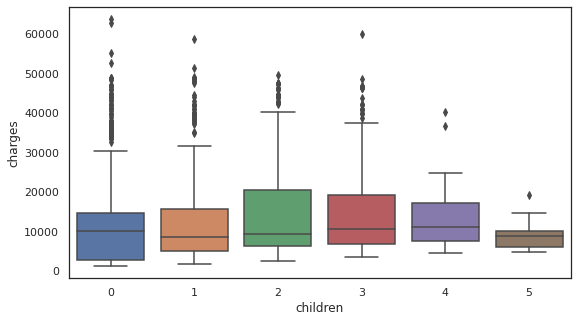

In [54]:
plt.figure(figsize=(9,5))

sns.boxplot(x='children', y='charges', data=data)
plt.show()

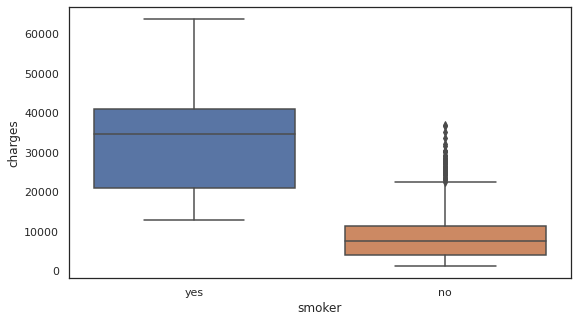

In [55]:
plt.figure(figsize=(9,5))

sns.boxplot(x='smoker', y='charges', data=data)
plt.show()

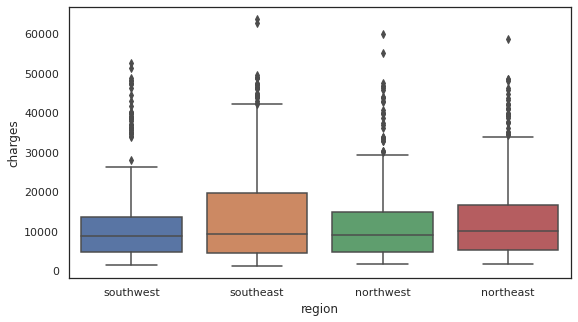

In [56]:
plt.figure(figsize=(9,5))

sns.boxplot(x='region', y='charges', data=data)
plt.show()

In [57]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
male_mean = data[data.sex == 'male']['charges'].mean()

female_mean = data[data.sex == 'female']['charges'].mean()

std_male = np.std(data[data.sex == 'male']['charges'])

std_female = np.std(data[data.sex == 'female']['charges'])

print('male std {:.2f} and mean {:.2f}'.format(std_male, male_mean))
print('female std {:.2f} and mean {:.2f}'.format(std_female, female_mean))

male std 12961.43 and mean 13956.75
female std 11120.30 and mean 12569.58


In [61]:
Ysmoker_mean = data[data.smoker == 'yes']['charges'].mean()

Nsmoker_mean = data[data.smoker == 'no']['charges'].mean()

std_Ysmoker = np.std(data[data.smoker == 'yes']['charges'])

std_Nsmoker = np.std(data[data.smoker == 'no']['charges'])

print('smoker yes std {:.2f} and mean {:.2f}'.format(std_Ysmoker, Ysmoker_mean))
print('smoker no {:.2f} and mean {:.2f}'.format(std_Nsmoker, Nsmoker_mean))

smoker yes std 11520.47 and mean 32050.23
smoker no 5990.96 and mean 8434.27


In [70]:
region = pd.get_dummies(data.region)
smoker = pd.get_dummies(data.smoker, drop_first=True)

smoker.columns = ['smoker']

smoker

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [79]:
df = np.copy(data.drop(['smoker', 'region'], axis=1))

col = ['age', 'sex', 'bmi', 'children', 'charges']

df = pd.DataFrame(df)

df.columns = col

In [83]:

y = np.copy(df.charges)


In [91]:
#df = df.drop('charges', axis=1)

frame = [df, region, smoker]

dtaframe = pd.concat(frame, axis=1)

dtaframe = dtaframe.drop('sex', axis=1)

In [92]:
dtaframe.head()

,age,bmi,children,northeast,northwest,southeast,southwest,smoker
0,19,27.9,0,0,0,0,1,1
1,18,33.77,1,0,0,1,0,0
2,28,33,3,0,0,1,0,0
3,33,22.705,0,0,1,0,0,0
4,32,28.88,0,0,1,0,0,0


In [94]:
dtaframe.age = dtaframe.age.astype(int)
dtaframe.bmi = dtaframe.bmi.astype(int)
dtaframe.children = dtaframe.children.astype(int)

In [99]:
dtaframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        1338 non-null   int64
 1   bmi        1338 non-null   int64
 2   children   1338 non-null   int64
 3   northeast  1338 non-null   uint8
 4   northwest  1338 non-null   uint8
 5   southeast  1338 non-null   uint8
 6   southwest  1338 non-null   uint8
 7   smoker     1338 non-null   uint8
dtypes: int64(3), uint8(5)
memory usage: 38.0 KB


In [166]:
X = dtaframe / np.max(dtaframe)

_X = (dtaframe - np.min(dtaframe)) / (np.max(dtaframe) - np.min(dtaframe))

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(_X, y, random_state=2)

In [168]:
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]


In [169]:
y_train.shape

(1003, 1)

In [170]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, y_train)

pred = lr.predict(X_test)

In [171]:
lr.coef_

array([[11387.58798322, 12631.8558908 ,  3061.86363473,   564.69912202,
          165.2333777 ,  -264.47314933,  -465.45935039, 23737.24569502]])

In [172]:
lr.intercept_

array([-2503.24037482])

In [173]:
mean_absolute_error(y_test, pred)

4192.76278775067

In [174]:
np.sqrt(mean_absolute_error(y_test, pred))

64.75154660508636

In [175]:
mean_squared_error(y_test, pred)

37779618.67922575

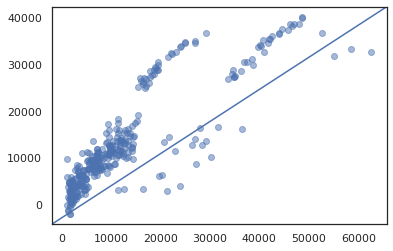

In [206]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_test, pred, alpha=.5)

In [200]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(X_test)

X_pca = pca.transform(X_test)

X_pca

array([[-0.29907121],
       [-0.28553053],
       [-0.29186209],
       [ 0.7657996 ],
       [-0.31028886],
       [ 0.79788099],
       [-0.47827121],
       [-0.29322233],
       [-0.48297164],
       [-0.46732795],
       [-0.47712277],
       [ 0.78749044],
       [ 0.94677173],
       [ 0.75086648],
       [-0.27000078],
       [ 0.76097003],
       [-0.29424513],
       [-0.46393472],
       [ 0.95541719],
       [-0.27966555],
       [-0.46890346],
       [-0.28851692],
       [-0.06903308],
       [-0.08513664],
       [ 0.98897626],
       [-0.30101048],
       [-0.29924167],
       [ 0.79870202],
       [-0.26733747],
       [-0.48795209],
       [ 0.7871208 ],
       [-0.46497013],
       [-0.29883833],
       [-0.4815792 ],
       [ 0.74748328],
       [ 0.79153682],
       [ 1.005544  ],
       [-0.28041156],
       [-0.0824379 ],
       [ 0.76747205],
       [-0.48735546],
       [-0.0680077 ],
       [-0.47864086],
       [-0.28989326],
       [ 0.78281873],
       [-0

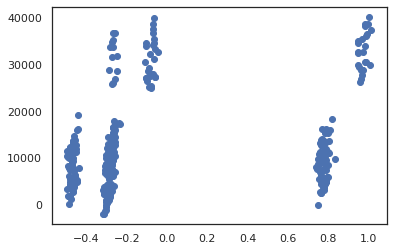

In [203]:
plt.scatter(X_pca, pred)

In [207]:
r2_score(y_test, pred)

0.7496797976827207

In [209]:
b = np.linalg.inv(_X.T @ _X) @ _X.T @ y

In [210]:
b

0    11826.4
1    12823.2
2     2386.4
3    -2104.3
4   -2449.96
5   -3146.01
6   -3073.16
7    23847.4
dtype: object

In [211]:
lr.coef_

array([[11387.58798322, 12631.8558908 ,  3061.86363473,   564.69912202,
          165.2333777 ,  -264.47314933,  -465.45935039, 23737.24569502]])

In [212]:
_X

,age,bmi,children,northeast,northwest,southeast,southwest,smoker
0,0.021739,0.315789,0.0,0.0,0.0,0.0,1.0,1.0
1,0.000000,0.473684,0.2,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.473684,0.6,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.184211,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0.342105,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.695652,0.394737,0.6,0.0,1.0,0.0,0.0,0.0
1334,0.000000,0.421053,0.0,1.0,0.0,0.0,0.0,0.0
1335,0.000000,0.552632,0.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.263158,0.0,0.0,0.0,0.0,1.0,0.0
